In [252]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [253]:
t = 0
h = 0.001
g = 9.8

PARTICLES = []
VELOCITY = []
T = []

In [254]:
def star(vector):
    matrix = np.zeros((3, 3), float)
    
    matrix[0][1] = -vector[2]
    matrix[0][2] = vector[1]
    matrix[1][0] = vector[2]
    matrix[1][2] = -vector[0]
    matrix[2][0] = -vector[1]
    matrix[2][1] = vector[0]
    
    return matrix

In [255]:
class Body:
    def __init__(self):
        self.sizeX = 2
        self.sizeY = 2
        self.sizeZ = 1
        self.density = 0.540
        self.volume = self.sizeX * self.sizeY * self.sizeZ
        self.mass = self.volume * self.density
        self.Ibody = self.mass / 12 * np.array([[self.sizeY ** 2 + self.sizeZ ** 2, 0, 0],
                                                [0, self.sizeX ** 2 + self.sizeZ ** 2, 0], 
                                                [0, 0, self.sizeX ** 2 + self.sizeY ** 2]], float)
        self.IbodyInv = np.linalg.inv(self.Ibody)
        
        self.position = np.array([[0], [0], [5]], float)
        self.rotation = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], float)
        self.P = self.mass * np.array([[2], [0], [0]], float)
        self.L = np.array([[0], [0], [0.3]], float)
        
        self.Iinv = self.rotation.dot(self.IbodyInv).dot(self.rotation.transpose())
        self.velocity = self.P / self.mass
        self.angular_velocity = self.Iinv.dot(self.L)
        
        self.particles = []
        self.particlesForce = []
        for x in [-self.sizeX / 2, self.sizeX / 2]:
            for y in [-self.sizeY / 2, self.sizeY / 2]:
                for z in [-self.sizeZ / 2, self.sizeZ / 2]:
                    self.particles.append(np.array([[x], [y], [z]], float))
        self.particlesCount = len(self.particles)
        
        for particle in self.particles:
            self.particlesForce.append((self.mass / self.particlesCount) * np.array([[0], [0], [-g]], float))
        
        self.updateForce()
        self.torque = np.array([[0], [0], [0]], dtype=float)
            
    def updateForce(self):
        self.force = np.array([[0], [0], [0]], dtype=float)
        for force in self.particlesForce:
            self.force += force

    def updateTorque(self):
        self.torque = np.array([[0], [0], [0]], dtype=float)
        for i in range(self.particlesCount):
            a = (self.particles[i] - self.position).reshape((1, 3))
            b = self.particlesForce[i].reshape((1, 3))
            self.torque = np.cross(a, b).reshape((3, 1))
    
    def update(self, delta):
        self.P += delta * self.force
        self.L += delta * self.torque
    
        self.Iinv = self.rotation.dot(self.IbodyInv).dot(self.rotation.transpose())
        self.velocity = self.P / self.mass
        self.angular_velocity = self.Iinv.dot(self.L)
        
        self.rotation += delta * star(self.angular_velocity).dot(self.rotation)
        self.position += delta * self.velocity
        
        self.updateForce()
        # self.updateTorque()
        
        # Имитация столкновения с полом
        for i in range(self.particlesCount):
            position = self.position + self.rotation @ self.particles[i]
            if position[2][0] < 0:
                self.P[0][0] *= 0.3
                self.P[1][0] *= 0.3
                self.P[2][0] *= -0.3
                break
    

In [256]:
body = Body()
PARTICLES.clear()
VELOCITY.clear()
T.clear()
    
while t <= 6.0:
    T.append(t)
    pos = []
    for particle in body.particles:
        pos.append(body.position + body.rotation @ particle)
    PARTICLES.append(pos)
    VELOCITY.append(body.velocity)
    body.update(h)
    
    t += h
    

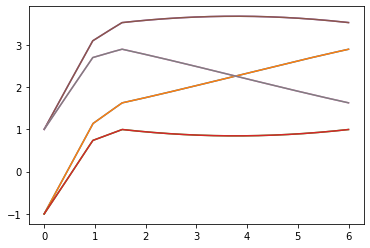

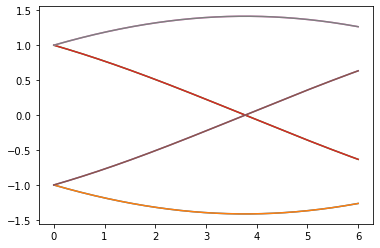

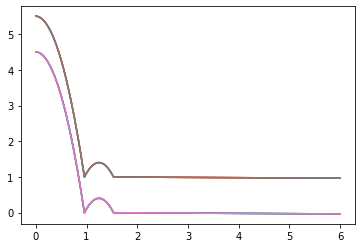

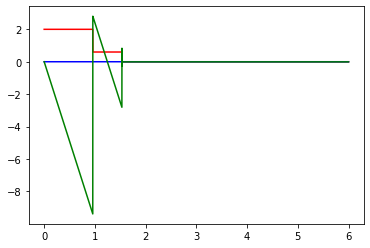

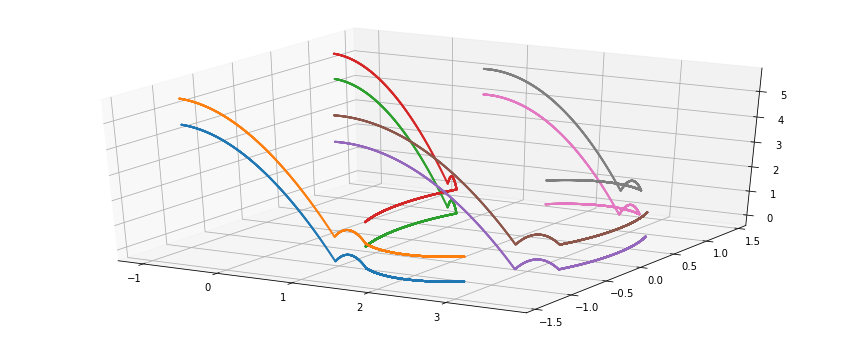

In [257]:
for i in range(len(body.particles)):
    plt.plot(T, [p[i][0][0] for p in PARTICLES], label="X")
plt.show()
for i in range(len(body.particles)):
    plt.plot(T, [p[i][1][0] for p in PARTICLES], label="Y")
plt.show()
for i in range(len(body.particles)):
    plt.plot(T, [p[i][2][0] for p in PARTICLES], label="Z")
plt.show()

plt.plot(T, [v[0][0] for v in VELOCITY], color="red", label="VX")
plt.plot(T, [v[1][0] for v in VELOCITY], color="blue", label="VY")
plt.plot(T, [v[2][0] for v in VELOCITY], color="green", label="VZ")
plt.show()

fig = plt.figure(figsize=[15, 6])
ax = fig.add_subplot(111, projection='3d')
    
for i in range(len(body.particles)):
    ax.scatter([p[i][0][0] for p in PARTICLES], [p[i][1][0] for p in PARTICLES], [p[i][2][0] for p in PARTICLES], s=1)